In [89]:
import h5py  #watch:   https://www.pythonforthelab.com/blog/how-to-use-hdf5-files-in-python/
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
def sectioning():

    #sectioning

    
    df_sec_X=df.groupby('X').apply(pd.DataFrame.to_numpy)  #location of the section is: sec_loc[...]
    df_sec_Y=df.groupby('Y').apply(pd.DataFrame.to_numpy)
    return df_sec_X, df_sec_Y

def sec_plot(dfm):
    #### 2D data visualization
    ### #sec_plot(sectioning()[0:X-dir|1:Y-dir][location]
    dfm0=pd.DataFrame(dfm)
    phi=np.reshape(dfm0[3].to_numpy(),(129,257))
    plt.imshow(phi, extent=[0, 4, 0, 2], origin='lower', cmap='jet')
    plt.show()
    # plt.colorbar()
    return

In [91]:
hdf= h5py.File(r'E:\baskar\data_set_microst\bikhodi.h5','w')

data=h5py.File(r'E:\baskar\data_set_microst\data_chi_3.400_phi_0.500.h5','r')
keys_list=list(data.keys())
sec_loc=np.linspace(0.0,4.0,257)  # you can change this line if you want to change the section location increment

ppp = np.arange(33153).reshape(129,257)
patch  = np.array_split(ppp, 2, axis=1)
patch_1 = patch[0].flatten()
patch_2 = (patch[0]+128).flatten()



for timestep in range(82,83):  #use:range(len(keys_list)) for full data
    
    data_np = sectioning()
    bbb_x = data_np[0]
    bbb_y = data_np[1]
    saving_frames = np.zeros((257*4, 129*129))
    
    dset=data[keys_list[timestep]] #keys_list shape is (83,)
    # connectivity=np.array(dset.get("elem_connectivity"))  # 8388608 (256*256*128) element with 8 nodes each
    ncoord=np.array(dset.get('node_coords')) # 8520321 (257*257*129) nodes with 3 (xyz) (4*4*2)
    phi_values=np.array(dset.get('node_data').get('phi')) # 8520321 values for phi

    ###change numpy arrays to pandas to make calculation easier
    df_xyz=pd.DataFrame(ncoord,columns=['X','Y','Z'])
    df_phi=pd.DataFrame(phi_values,columns=['phi'])
#     df_NN=pd.DataFrame(np.arange(len(df_phi)),columns=['NN'])
#     df=pd.concat([df_xyz,df_phi,df_NN],axis=1,sort=False)
    df=pd.concat([df_xyz,df_phi],axis=1,sort=False)


    # sec_plot(sectioning()[0][sec_loc[50]])  #sec_plot(sectioning()[0:X-dir|1:Y-dir][location]

    G1=hdf.create_group('G_/'+keys_list[timestep])

    for j, i in enumerate(range(0, 257*4, 4)):
        saving_frames[i] = bbb_x[sec_loc[j]][:,3][patch_1]
        saving_frames[i+1] = bbb_x[sec_loc[j]][:,3][patch_2]
        saving_frames[i+2] = bbb_y[sec_loc[j]][:,3][patch_1]    
        saving_frames[i+3] = bbb_y[sec_loc[j]][:,3][patch_2]  
    
    G1.create_dataset(str(timestep), data=saving_frames)

data.close()
hdf.close()

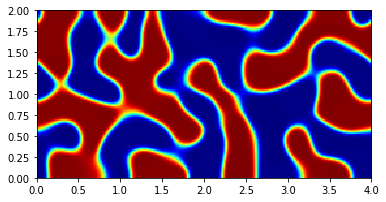

In [92]:
sec_plot(sectioning()[0][sec_loc[100]])  #sec_plot(sectioning()[0:X-dir|1:Y-dir][location]
hdf.close()

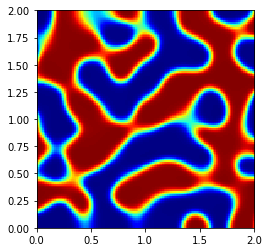

In [93]:
plt.imshow(saving_frames[200].reshape(129,129), extent=[0, 2, 0, 2], origin='lower', cmap='jet')
plt.show()